# **Project Machine Learning**
Kyana Marckx, G2E2, 2022 - 2023

## Verkennen van de data

### Imports

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, ConfusionMatrixDisplay, confusion_matrix, classification_report, f1_score, precision_score, recall_score, r2_score, roc_auc_score, roc_curve, RocCurveDisplay, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')

### Verkenning

In [2]:
# read weblogs.csv
weblogs = pd.read_csv('weblogs.csv')

In [3]:
# check weblogs
weblogs

,ID,NUMBER_OF_REQUESTS,TOTAL_DURATION,AVERAGE_TIME,STANDARD_DEVIATION,REPEATED_REQUESTS,HTTP_RESPONSE_2XX,HTTP_RESPONSE_3XX,HTTP_RESPONSE_4XX,HTTP_RESPONSE_5XX,...,DEPTH,STD_DEPTH,CONSECUTIVE,DATA,PPI,SF_REFERRER,SF_FILETYPE,MAX_BARRAGE,PENALTY,ROBOT
0,obSnwGoBCue8G08E_WCX,79,592,7.589744,1.800540,0.000000,0.873418,0.126582,0.000000,0.000000,...,4.0,0.494041,0.101266,1555089.0,2.718334e+07,0.000000,0.205128,1,0,1
1,nLSnwGoBCue8G08E_WCX,350,103621,296.908300,260.332670,0.000000,0.997143,0.000000,0.002857,0.000000,...,6.0,0.341303,0.425714,2071344.0,1.427714e+01,0.547278,0.461318,4,0,1
2,ErSowGoBCue8G08ECmHa,15,368,26.285715,87.329780,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.0,0.000000,0.000000,49505.0,1.413333e+01,0.642857,1.000000,2,0,0
3,E7SowGoBCue8G08ECmHa,28,11,0.407407,1.097447,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.0,0.000000,0.821429,45984.0,1.332143e+01,0.037037,0.148148,5,0,0
4,FbSowGoBCue8G08ECmHa,9342,80946,8.665668,17.566462,0.000107,0.996896,0.002569,0.000214,0.000321,...,4.0,0.152943,0.953757,83171793.0,1.307407e+01,0.000000,0.023552,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67347,Q7WwwGoBCue8G08Ejh-q,17,2,0.125000,0.330719,0.000000,1.000000,0.000000,0.000000,0.000000,...,6.0,1.131111,0.235294,132109.0,6.470588e+00,0.562500,0.437500,0,0,0
67348,3rSowGoBCue8G08ETmjV,1,0,0.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,...,4.0,0.000000,0.000000,13172.0,1.500000e+01,NaN,NaN,0,0,1
67349,ZLW1wGoBCue8G08EmYME,1,0,0.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.0,0.000000,0.000000,1357.0,9.000000e+00,NaN,NaN,0,0,1
67350,orW0wGoBCue8G08El2_N,1,0,0.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,...,4.0,0.000000,0.000000,7904.0,1.200000e+01,NaN,NaN,0,0,1


In [4]:
# check weblogs info
weblogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67352 entries, 0 to 67351
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  67352 non-null  object 
 1   NUMBER_OF_REQUESTS  67352 non-null  int64  
 2   TOTAL_DURATION      67352 non-null  int64  
 3   AVERAGE_TIME        67352 non-null  float64
 4   STANDARD_DEVIATION  52945 non-null  float64
 5   REPEATED_REQUESTS   67352 non-null  float64
 6   HTTP_RESPONSE_2XX   67352 non-null  float64
 7   HTTP_RESPONSE_3XX   67352 non-null  float64
 8   HTTP_RESPONSE_4XX   67352 non-null  float64
 9   HTTP_RESPONSE_5XX   67352 non-null  float64
 10  GET_METHOD          67352 non-null  float64
 11  POST_METHOD         67352 non-null  float64
 12  HEAD_METHOD         67352 non-null  float64
 13  OTHER_METHOD        67352 non-null  float64
 14  NIGHT               67352 non-null  float64
 15  UNASSIGNED          67352 non-null  float64
 16  IMAG

In [5]:
# describe weblogs
weblogs.describe()

,NUMBER_OF_REQUESTS,TOTAL_DURATION,AVERAGE_TIME,STANDARD_DEVIATION,REPEATED_REQUESTS,HTTP_RESPONSE_2XX,HTTP_RESPONSE_3XX,HTTP_RESPONSE_4XX,HTTP_RESPONSE_5XX,GET_METHOD,...,DEPTH,STD_DEPTH,CONSECUTIVE,DATA,PPI,SF_REFERRER,SF_FILETYPE,MAX_BARRAGE,PENALTY,ROBOT
count,67352.000000,6.735200e+04,67352.000000,52945.000000,67352.000000,67352.000000,67352.000000,67352.000000,67352.000000,67352.000000,...,67352.000000,67352.000000,67352.000000,6.735200e+04,6.735200e+04,52945.000000,52945.000000,67352.000000,67352.000000,67352.000000
mean,60.242354,7.282704e+02,33.599747,40.319142,0.041596,0.979726,0.008104,0.011015,0.001155,0.993014,...,4.843405,0.681596,0.358740,3.221064e+05,1.407726e+06,0.260875,0.385265,14.644198,1.577785,0.200350
std,170.405463,8.037288e+03,150.974254,89.886341,0.079276,0.111944,0.058313,0.092476,0.026231,0.054588,...,1.491212,0.598631,0.280223,1.937276e+06,4.307353e+07,0.243584,0.248843,19.568441,5.816903,0.400266
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000e+00,0.071429,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,3.000000,0.000000,0.000000,9.866000e+03,7.166667e+00,0.093750,0.243902,0.000000,0.000000,0.000000
50%,22.000000,3.700000e+01,1.473684,6.418347,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,6.000000,0.772328,0.380694,9.409250e+04,1.075352e+01,0.200000,0.339450,2.000000,0.000000,0.000000
75%,63.000000,3.600000e+02,6.686705,31.717476,0.052441,1.000000,0.000000,0.000000,0.000000,1.000000,...,6.000000,1.224745,0.578947,2.688252e+05,1.300000e+01,0.342105,0.500000,28.000000,1.000000,0.000000
max,15265.000000,1.168297e+06,1800.000000,893.500000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,4.242641,1.000000,1.690364e+08,2.147484e+09,1.000000,1.000000,243.000000,723.000000,1.000000


In [6]:
# check weblogs shape
weblogs.shape

(67352, 32)

In [7]:
# check weblogs columns
weblogs.columns

Index(['ID', 'NUMBER_OF_REQUESTS', 'TOTAL_DURATION', 'AVERAGE_TIME',
       'STANDARD_DEVIATION', 'REPEATED_REQUESTS', 'HTTP_RESPONSE_2XX',
       'HTTP_RESPONSE_3XX', 'HTTP_RESPONSE_4XX', 'HTTP_RESPONSE_5XX',
       'GET_METHOD', 'POST_METHOD', 'HEAD_METHOD', 'OTHER_METHOD', 'NIGHT',
       'UNASSIGNED', 'IMAGES', 'TOTAL_HTML', 'HTML_TO_IMAGE', 'HTML_TO_CSS',
       'HTML_TO_JS', 'WIDTH', 'DEPTH', 'STD_DEPTH', 'CONSECUTIVE', 'DATA',
       'PPI', 'SF_REFERRER', 'SF_FILETYPE', 'MAX_BARRAGE', 'PENALTY', 'ROBOT'],
      dtype='object')

## Data cleaning

### Correlation Matrix

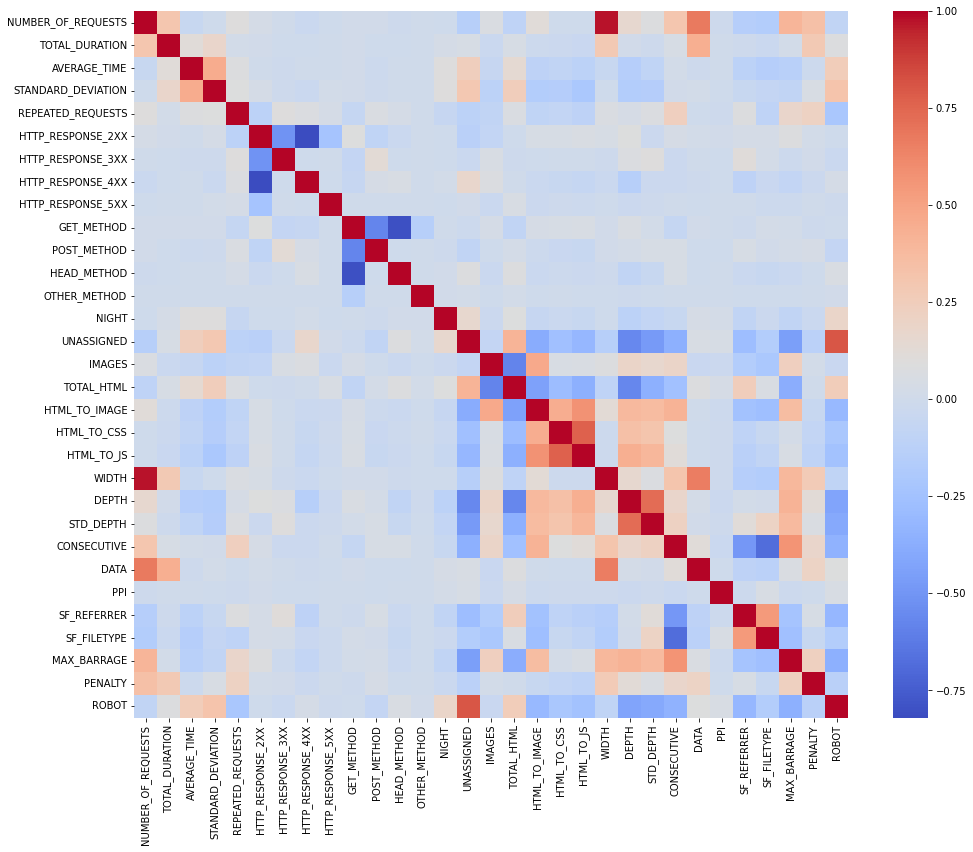

DEPTH                -0.427654
STD_DEPTH            -0.396970
MAX_BARRAGE          -0.364920
CONSECUTIVE          -0.344941
SF_REFERRER          -0.319636
HTML_TO_IMAGE        -0.303528
HTML_TO_JS           -0.245619
HTML_TO_CSS          -0.214941
REPEATED_REQUESTS    -0.213395
SF_FILETYPE          -0.159089
PENALTY              -0.124917
WIDTH                -0.089059
NUMBER_OF_REQUESTS   -0.086990
POST_METHOD          -0.069698
IMAGES               -0.041017
HTTP_RESPONSE_3XX    -0.034007
HTTP_RESPONSE_5XX    -0.011061
GET_METHOD           -0.009266
HTTP_RESPONSE_2XX    -0.003817
OTHER_METHOD          0.010243
HTTP_RESPONSE_4XX     0.029202
PPI                   0.051511
HEAD_METHOD           0.060153
TOTAL_DURATION        0.076580
DATA                  0.085689
NIGHT                 0.186689
TOTAL_HTML            0.253633
AVERAGE_TIME          0.255445
STANDARD_DEVIATION    0.321354
UNASSIGNED            0.807035
ROBOT                 1.000000
Name: ROBOT, dtype: float64


In [8]:
# find relations for robot
robot = 'ROBOT'

# calculate the correlation coefficients for all columns
corrMatrix_All = weblogs.corr()

# calculte the correlation coefficients for robot
corrMatrix_Robot = corrMatrix_All[robot]

# sort the correlation coefficients for robot
related = corrMatrix_Robot.sort_values(ascending=True)

# plot the correlation coefficients for robot in a heatmap and numbers
plt.figure(figsize=(16, 13))
sns.heatmap(corrMatrix_All, annot=False, fmt='.2f', cmap='coolwarm')
plt.show()
print(related)

### Values to keep

In [9]:
# put the columns to keep in an array
keep = ['UNASSIGNED', 'STANDARD_DEVIATION', 'MAX_BARRAGE', 'CONSECUTIVE', 'DEPTH', 'STD_DEPTH', 'SF_REFERRER', 'HTML_TO_IMAGE', 'ROBOT']

# plot the pairplot
# sns.pairplot(weblogs[keep], hue='ROBOT', palette='husl')

In [10]:
# select the wanted columns to keep
weblogs_clean = weblogs.loc[:, keep]

### Boxplots for outliers

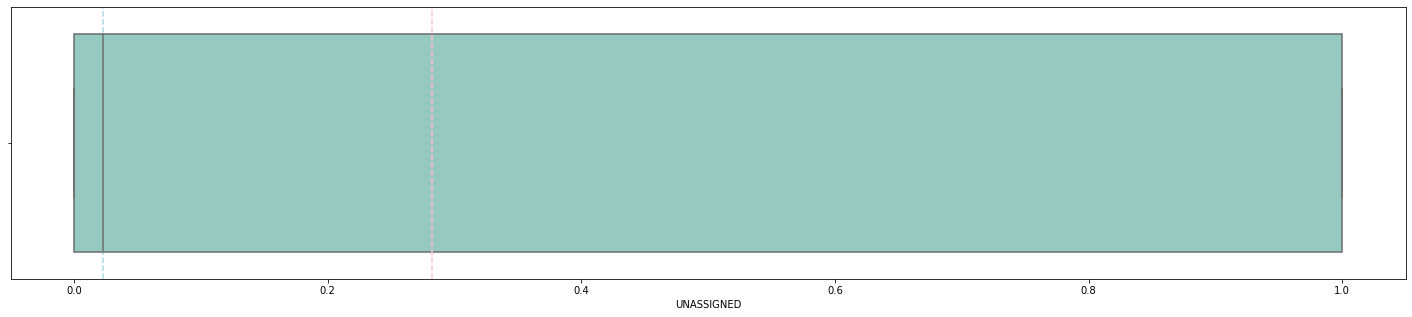

In [11]:
# set the figsize and plot the boxplot
plt.figure(figsize=(25, 5))
sns.boxplot(data=weblogs_clean, x='UNASSIGNED', palette="Set3")
median = weblogs_clean['UNASSIGNED'].median()
mean = weblogs_clean['UNASSIGNED'].mean()
plt.axvline(median, color='lightblue', linestyle='--')
plt.axvline(mean, color='pink', linestyle='--')

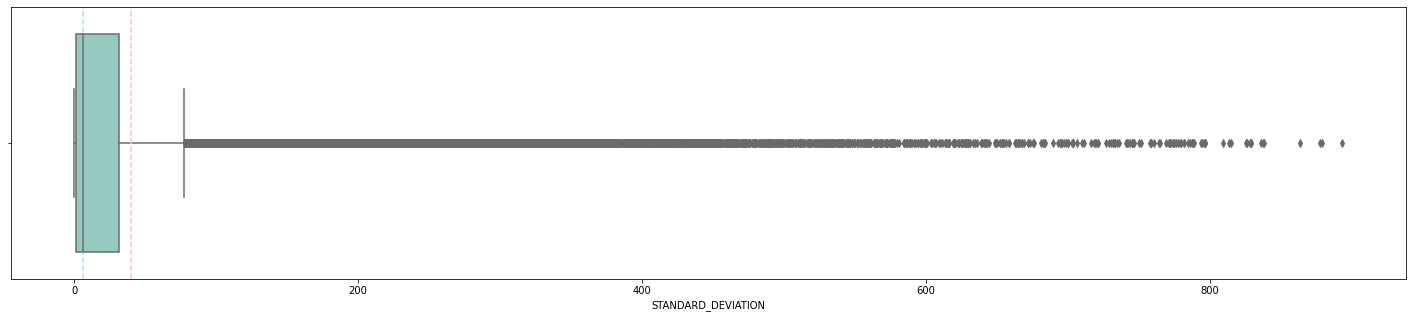

In [12]:
# set the figsize and plot the boxplot
plt.figure(figsize=(25, 5))
sns.boxplot(data=weblogs_clean, x='STANDARD_DEVIATION', palette="Set3")
median = weblogs_clean['STANDARD_DEVIATION'].median()
mean = weblogs_clean['STANDARD_DEVIATION'].mean()
plt.axvline(median, color='lightblue', linestyle='--')
plt.axvline(mean, color='pink', linestyle='--')

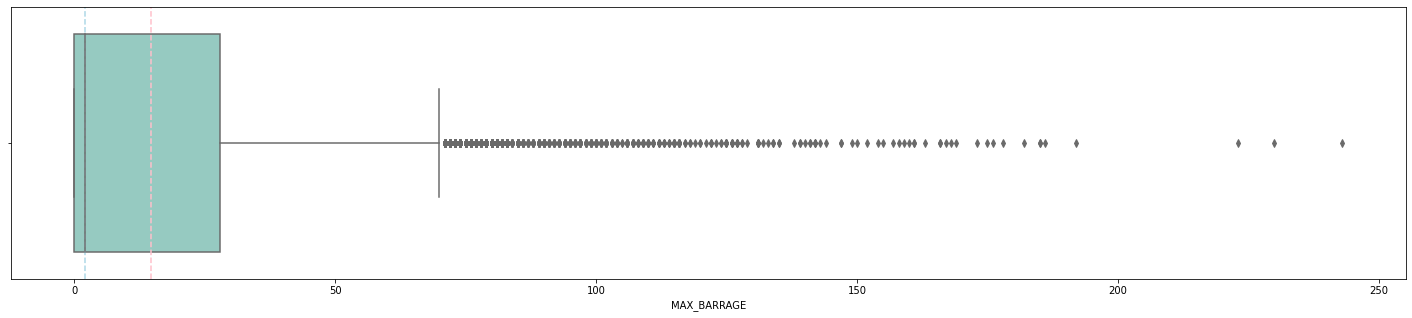

In [13]:
# set the figsize and plot the boxplot
plt.figure(figsize=(25, 5))
sns.boxplot(data=weblogs_clean, x='MAX_BARRAGE', palette="Set3")
median = weblogs_clean['MAX_BARRAGE'].median()
mean = weblogs_clean['MAX_BARRAGE'].mean()
plt.axvline(median, color='lightblue', linestyle='--')
plt.axvline(mean, color='pink', linestyle='--')

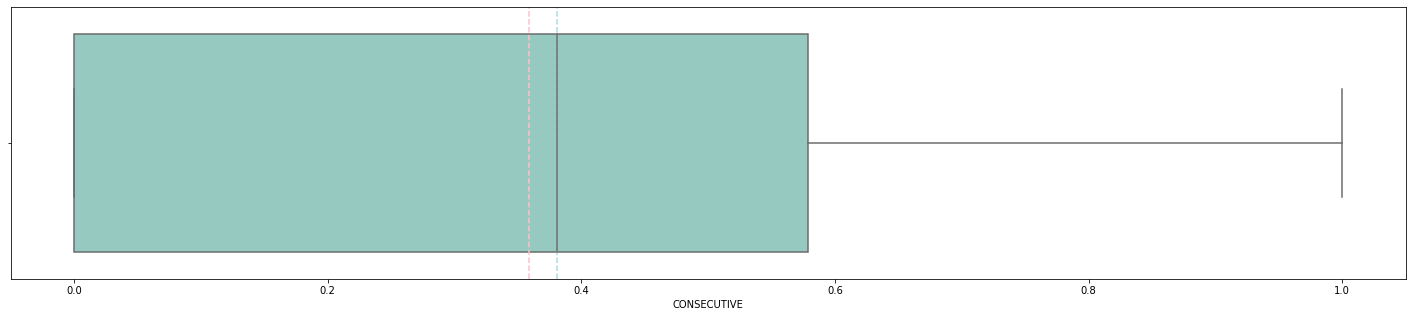

In [14]:
# set the figsize and plot the boxplot
plt.figure(figsize=(25, 5))
sns.boxplot(data=weblogs_clean, x='CONSECUTIVE', palette="Set3")
median = weblogs_clean['CONSECUTIVE'].median()
mean = weblogs_clean['CONSECUTIVE'].mean()
plt.axvline(median, color='lightblue', linestyle='--')
plt.axvline(mean, color='pink', linestyle='--')

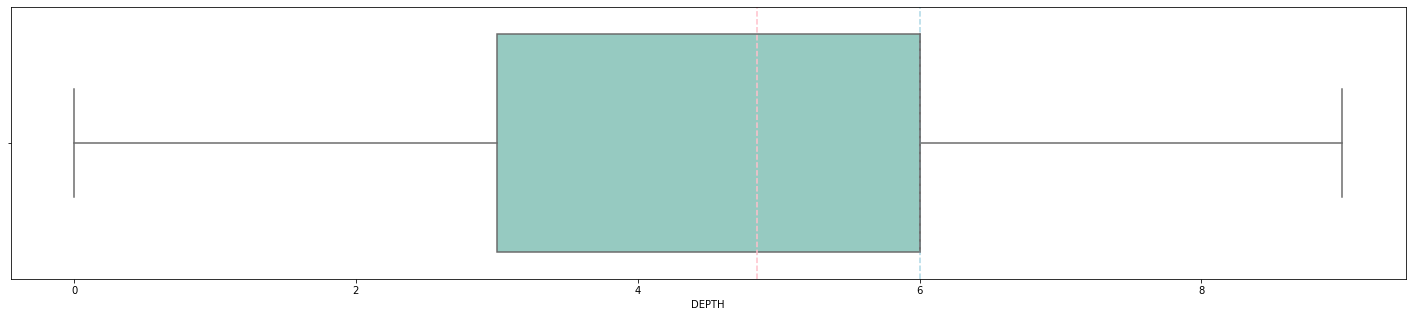

In [15]:
# set the figsize and plot the boxplot
plt.figure(figsize=(25, 5))
sns.boxplot(data=weblogs_clean, x='DEPTH', palette="Set3")
median = weblogs_clean['DEPTH'].median()
mean = weblogs_clean['DEPTH'].mean()
plt.axvline(median, color='lightblue', linestyle='--')
plt.axvline(mean, color='pink', linestyle='--')

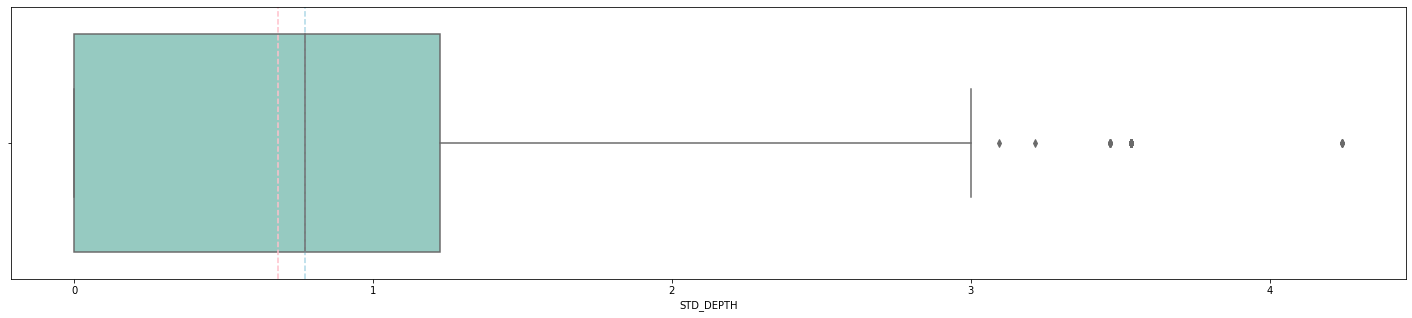

In [16]:
# set the figsize and plot the boxplot
plt.figure(figsize=(25, 5))
sns.boxplot(data=weblogs_clean, x='STD_DEPTH', palette="Set3")
median = weblogs_clean['STD_DEPTH'].median()
mean = weblogs_clean['STD_DEPTH'].mean()
plt.axvline(median, color='lightblue', linestyle='--')
plt.axvline(mean, color='pink', linestyle='--')

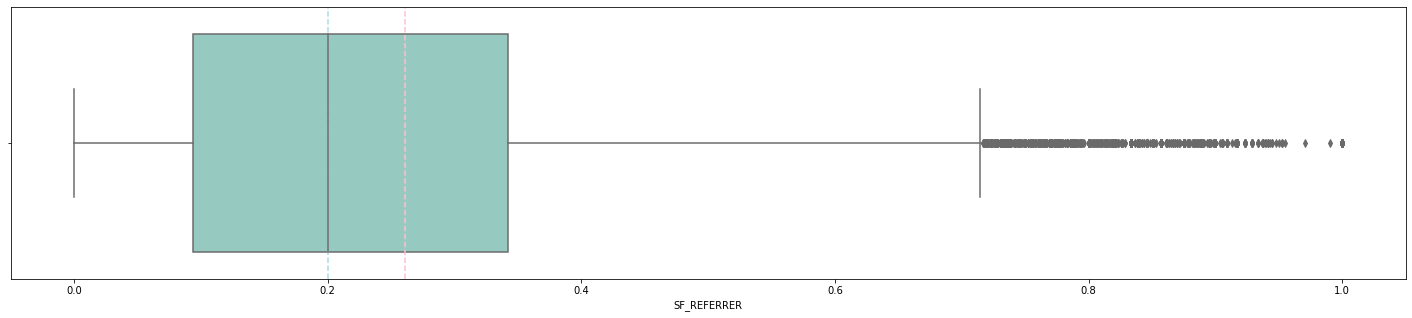

In [17]:
# set the figsize and plot the boxplot
plt.figure(figsize=(25, 5))
sns.boxplot(data=weblogs_clean, x='SF_REFERRER', palette="Set3")
median = weblogs_clean['SF_REFERRER'].median()
mean = weblogs_clean['SF_REFERRER'].mean()
plt.axvline(median, color='lightblue', linestyle='--')
plt.axvline(mean, color='pink', linestyle='--')

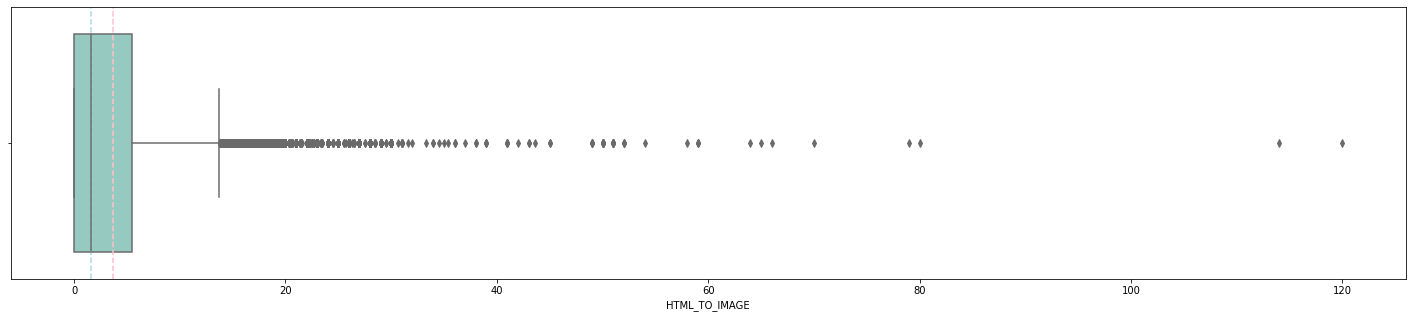

In [18]:
# set the figsize and plot the boxplot
plt.figure(figsize=(25, 5))
sns.boxplot(data=weblogs_clean, x='HTML_TO_IMAGE', palette="Set3")
median = weblogs_clean['HTML_TO_IMAGE'].median()
mean = weblogs_clean['HTML_TO_IMAGE'].mean()
plt.axvline(x=median, color='lightblue', linestyle='--')
plt.axvline(x=mean, color='pink', linestyle='--')

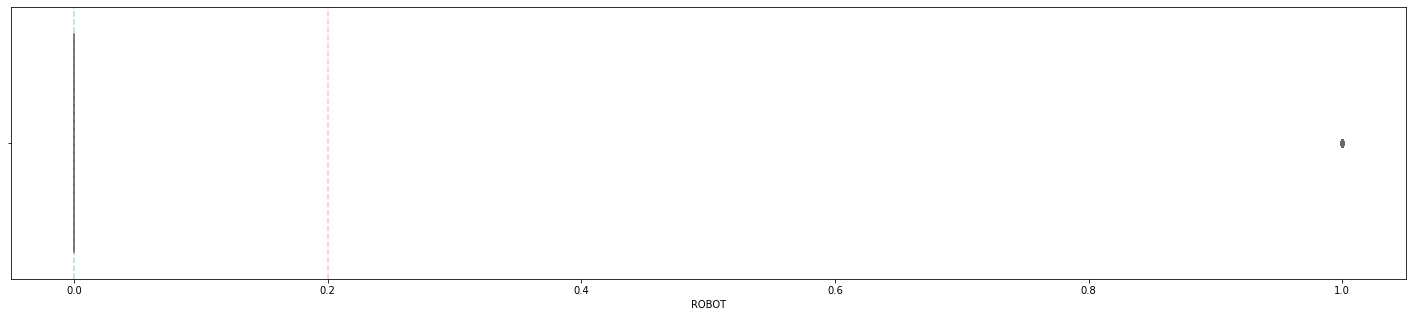

In [19]:
# set the figsize and plot the boxplot
plt.figure(figsize=(25, 5))
sns.boxplot(data=weblogs_clean, x='ROBOT', palette="Set3")
median = weblogs_clean['ROBOT'].median()
mean = weblogs_clean['ROBOT'].mean()
plt.axvline(median, color='lightblue', linestyle='--')
plt.axvline(mean, color='pink', linestyle='--')

### Handle outliers and missing values

In [20]:
# find the outliers for UNASSIGNED and replace them with the median
Q3 = weblogs_clean['UNASSIGNED'].quantile(0.75)
Q1 = weblogs_clean['UNASSIGNED'].quantile(0.25)
IQR = Q3 - Q1

outliers = weblogs_clean[(weblogs_clean['UNASSIGNED'] < Q1 - 1.5 * IQR) | (weblogs_clean['UNASSIGNED'] > Q3 + 1.5 * IQR)]
weblogs_clean.loc[outliers.index, 'UNASSIGNED'] = weblogs_clean['UNASSIGNED'].median()

In [21]:
# find the outliers for STANDARD_DEVIATION and replace them with the median
Q3 = weblogs_clean['STANDARD_DEVIATION'].quantile(0.75)
Q1 = weblogs_clean['STANDARD_DEVIATION'].quantile(0.25)
IQR = Q3 - Q1

outliers = weblogs_clean[(weblogs_clean['STANDARD_DEVIATION'] < Q1 - 1.5 * IQR) | (weblogs_clean['STANDARD_DEVIATION'] > Q3 + 1.5 * IQR)]
weblogs_clean.loc[outliers.index, 'STANDARD_DEVIATION'] = weblogs_clean['STANDARD_DEVIATION'].median()

In [22]:
# find the outliers for MAX_BARRAGE and replace them with the median
Q3 = weblogs_clean['MAX_BARRAGE'].quantile(0.75)
Q1 = weblogs_clean['MAX_BARRAGE'].quantile(0.25)
IQR = Q3 - Q1

outliers = weblogs_clean[(weblogs_clean['MAX_BARRAGE'] < Q1 - 1.5 * IQR) | (weblogs_clean['MAX_BARRAGE'] > Q3 + 1.5 * IQR)]
weblogs_clean.loc[outliers.index, 'MAX_BARRAGE'] = weblogs_clean['MAX_BARRAGE'].median()

In [23]:
# find the outliers for STD_DEPTH and replace them with the median
Q3 = weblogs_clean['STD_DEPTH'].quantile(0.75)
Q1 = weblogs_clean['STD_DEPTH'].quantile(0.25)
IQR = Q3 - Q1

outliers = weblogs_clean[(weblogs_clean['STD_DEPTH'] < Q1 - 1.5 * IQR) | (weblogs_clean['STD_DEPTH'] > Q3 + 1.5 * IQR)]
weblogs_clean.loc[outliers.index, 'STD_DEPTH'] = weblogs_clean['STD_DEPTH'].median()

In [24]:
# find the outliers for SF_REFERRER and replace them with the median
Q3 = weblogs_clean['SF_REFERRER'].quantile(0.75)
Q1 = weblogs_clean['SF_REFERRER'].quantile(0.25)
IQR = Q3 - Q1

outliers = weblogs_clean[(weblogs_clean['SF_REFERRER'] < Q1 - 1.5 * IQR) | (weblogs_clean['SF_REFERRER'] > Q3 + 1.5 * IQR)]
weblogs_clean.loc[outliers.index, 'SF_REFERRER'] = weblogs_clean['SF_REFERRER'].median()

In [25]:
# find the outliers for HTML_TO_IMAGE and replace them with the median
Q3 = weblogs_clean['HTML_TO_IMAGE'].quantile(0.75)
Q1 = weblogs_clean['HTML_TO_IMAGE'].quantile(0.25)
IQR = Q3 - Q1

outliers = weblogs_clean[(weblogs_clean['HTML_TO_IMAGE'] < Q1 - 1.5 * IQR) | (weblogs_clean['HTML_TO_IMAGE'] > Q3 + 1.5 * IQR)]
weblogs_clean.loc[outliers.index, 'HTML_TO_IMAGE'] = weblogs_clean['HTML_TO_IMAGE'].median()

In [26]:
# make sure there are no row with "Nan" values
weblogs_clean = weblogs_clean.fillna(weblogs_clean.mean())

weblogs_clean.head(25)

,UNASSIGNED,STANDARD_DEVIATION,MAX_BARRAGE,CONSECUTIVE,DEPTH,STD_DEPTH,SF_REFERRER,HTML_TO_IMAGE,ROBOT
0,1.000000,1.800540,1,0.101266,4.0,0.494041,0.000000,0.112676,1
1,0.671429,6.418347,4,0.425714,6.0,0.341303,0.547278,0.000000,1
2,0.000000,6.418347,2,0.000000,3.0,0.000000,0.642857,1.000000,0
3,0.000000,1.097447,5,0.821429,3.0,0.000000,0.037037,1.600000,0
4,1.000000,17.566462,1,0.953757,4.0,0.152943,0.000000,0.011157,1
5,0.000000,26.161804,6,0.545455,3.0,0.000000,0.200000,0.500000,0
6,0.010204,1.795295,30,0.551020,6.0,1.281412,0.113402,1.600000,0
7,0.416667,20.475342,1,0.000000,3.0,0.000000,0.200000,0.000000,0
8,0.000000,7.437347,32,0.645161,6.0,0.252624,0.172973,3.870968,0
9,0.090909,4.427189,3,0.363636,6.0,1.489356,0.200000,2.500000,0


### Check the new boxplots

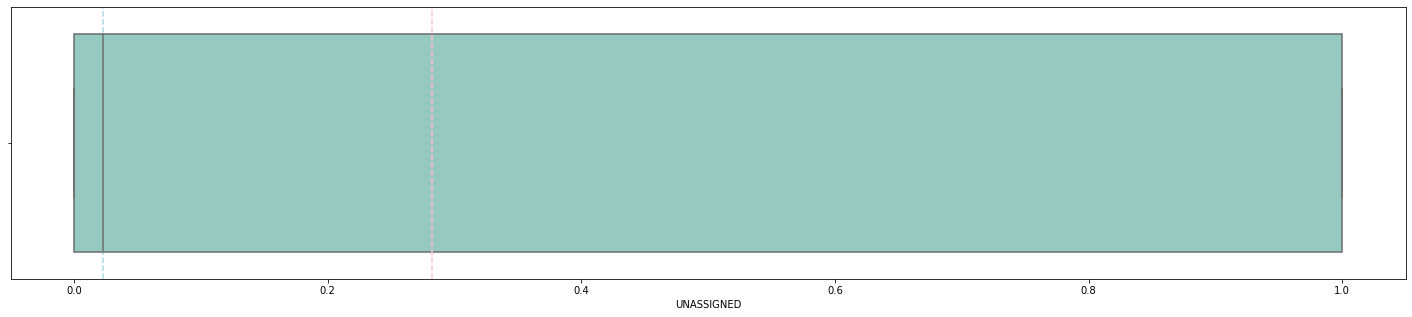

In [27]:
# set the figsize and plot the boxplot
plt.figure(figsize=(25, 5))
sns.boxplot(data=weblogs_clean, x='UNASSIGNED', palette="Set3")
median = weblogs_clean['UNASSIGNED'].median()
mean = weblogs_clean['UNASSIGNED'].mean()
plt.axvline(median, color='lightblue', linestyle='--')
plt.axvline(mean, color='pink', linestyle='--')

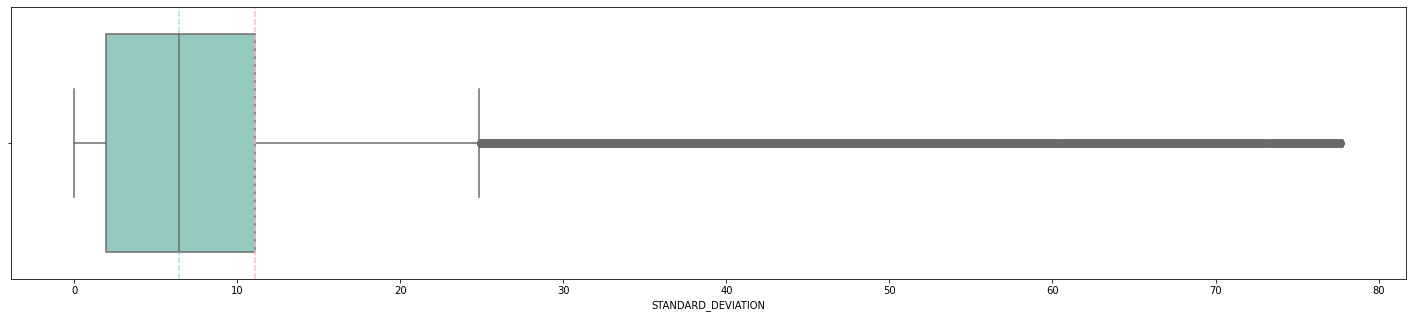

In [28]:
# set the figsize and plot the boxplot
plt.figure(figsize=(25, 5))
sns.boxplot(data=weblogs_clean, x='STANDARD_DEVIATION', palette="Set3")
median = weblogs_clean['STANDARD_DEVIATION'].median()
mean = weblogs_clean['STANDARD_DEVIATION'].mean()
plt.axvline(median, color='lightblue', linestyle='--')
plt.axvline(mean, color='pink', linestyle='--')

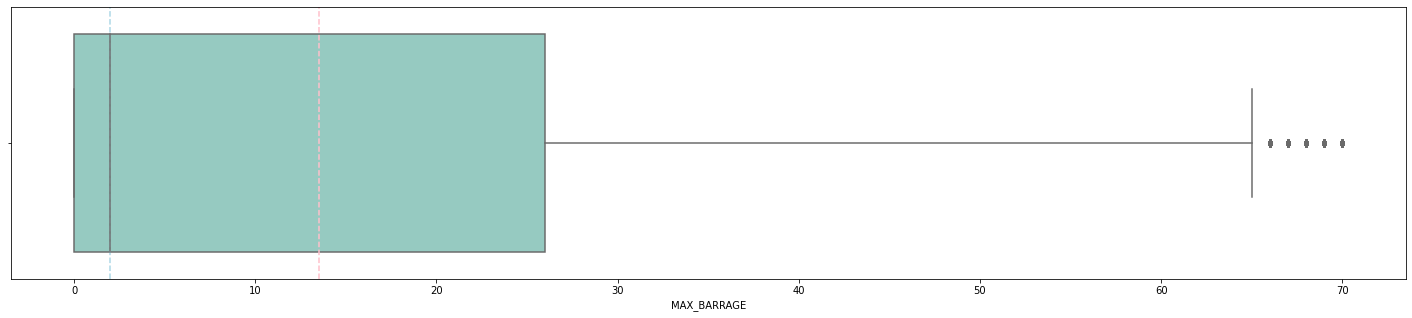

In [29]:
# set the figsize and plot the boxplot
plt.figure(figsize=(25, 5))
sns.boxplot(data=weblogs_clean, x='MAX_BARRAGE', palette="Set3")
median = weblogs_clean['MAX_BARRAGE'].median()
mean = weblogs_clean['MAX_BARRAGE'].mean()
plt.axvline(median, color='lightblue', linestyle='--')
plt.axvline(mean, color='pink', linestyle='--')

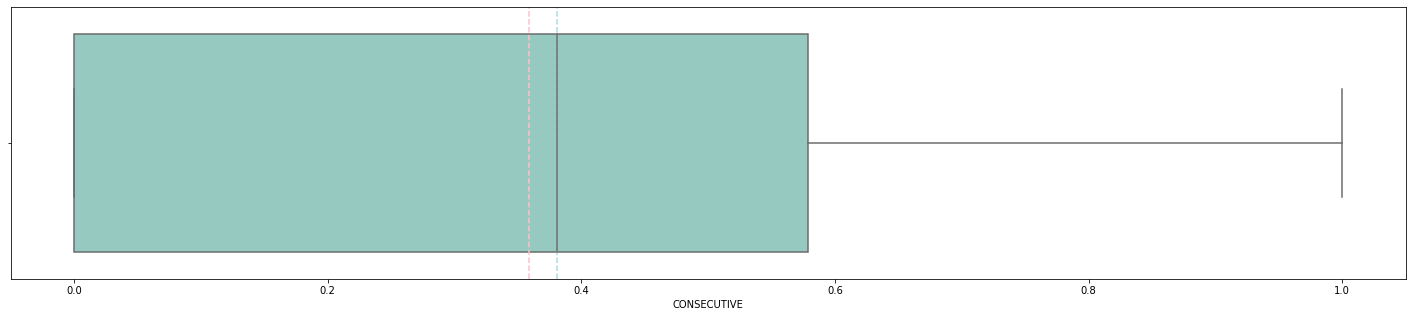

In [30]:
# set the figsize and plot the boxplot
plt.figure(figsize=(25, 5))
sns.boxplot(data=weblogs_clean, x='CONSECUTIVE', palette="Set3")
median = weblogs_clean['CONSECUTIVE'].median()
mean = weblogs_clean['CONSECUTIVE'].mean()
plt.axvline(median, color='lightblue', linestyle='--')
plt.axvline(mean, color='pink', linestyle='--')

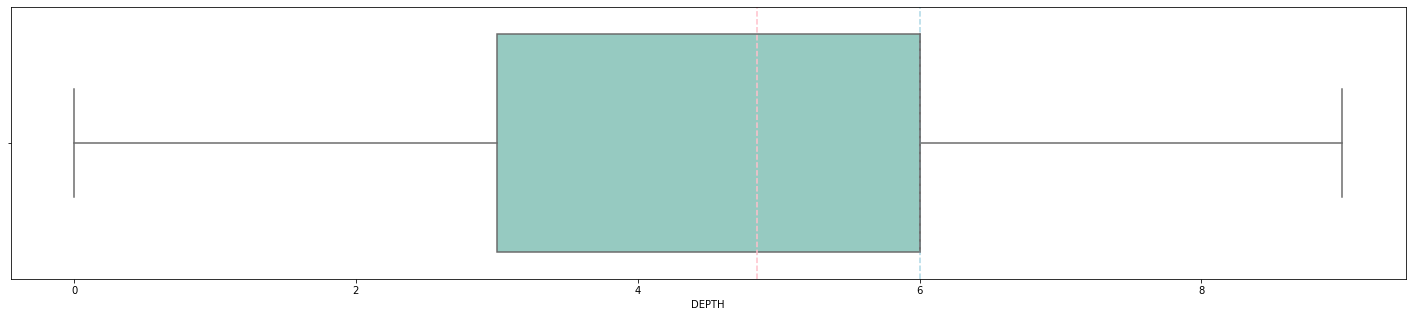

In [31]:
# set the figsize and plot the boxplot
plt.figure(figsize=(25, 5))
sns.boxplot(data=weblogs_clean, x='DEPTH', palette="Set3")
median = weblogs_clean['DEPTH'].median()
mean = weblogs_clean['DEPTH'].mean()
plt.axvline(median, color='lightblue', linestyle='--')
plt.axvline(mean, color='pink', linestyle='--')

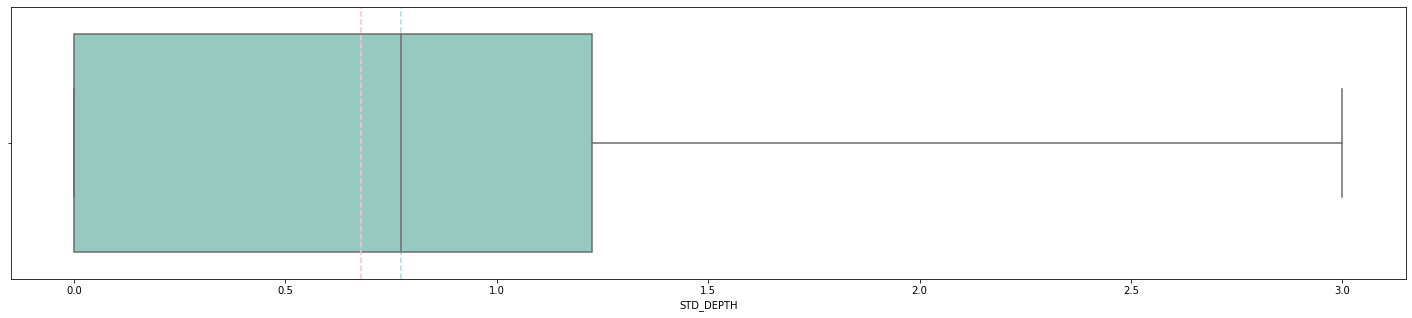

In [32]:
# set the figsize and plot the boxplot
plt.figure(figsize=(25, 5))
sns.boxplot(data=weblogs_clean, x='STD_DEPTH', palette="Set3")
median = weblogs_clean['STD_DEPTH'].median()
mean = weblogs_clean['STD_DEPTH'].mean()
plt.axvline(median, color='lightblue', linestyle='--')
plt.axvline(mean, color='pink', linestyle='--')

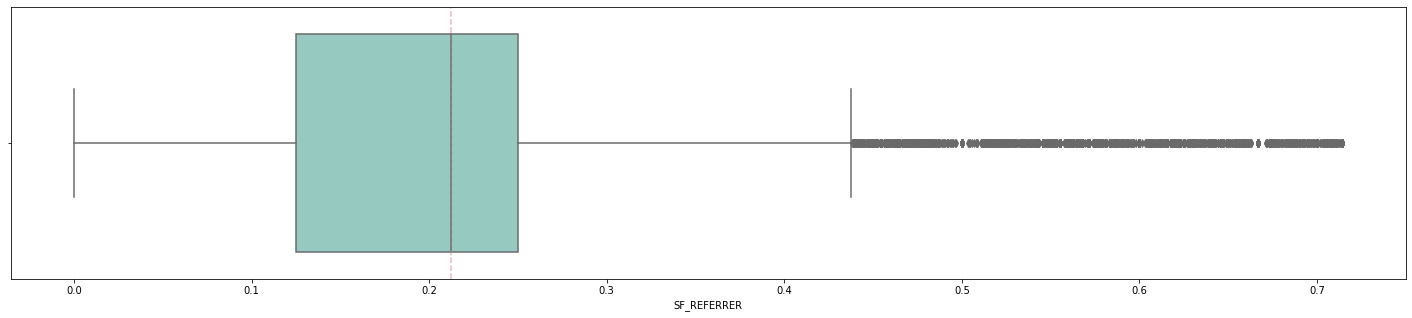

In [33]:
# set the figsize and plot the boxplot
plt.figure(figsize=(25, 5))
sns.boxplot(data=weblogs_clean, x='SF_REFERRER', palette="Set3")
median = weblogs_clean['SF_REFERRER'].median()
mean = weblogs_clean['SF_REFERRER'].mean()
plt.axvline(median, color='lightblue', linestyle='--')
plt.axvline(mean, color='pink', linestyle='--')

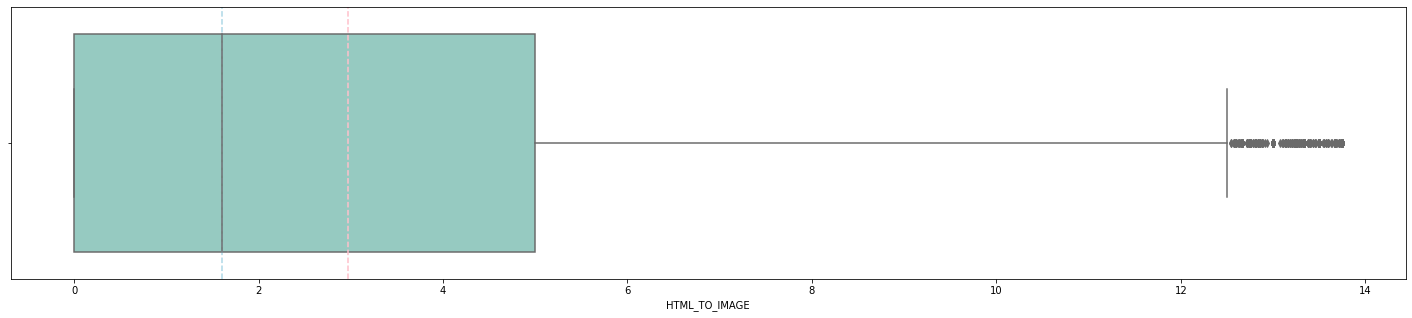

In [34]:
# set the figsize and plot the boxplot
plt.figure(figsize=(25, 5))
sns.boxplot(data=weblogs_clean, x='HTML_TO_IMAGE', palette="Set3")
median = weblogs_clean['HTML_TO_IMAGE'].median()
mean = weblogs_clean['HTML_TO_IMAGE'].mean()
plt.axvline(x=median, color='lightblue', linestyle='--')
plt.axvline(x=mean, color='pink', linestyle='--')

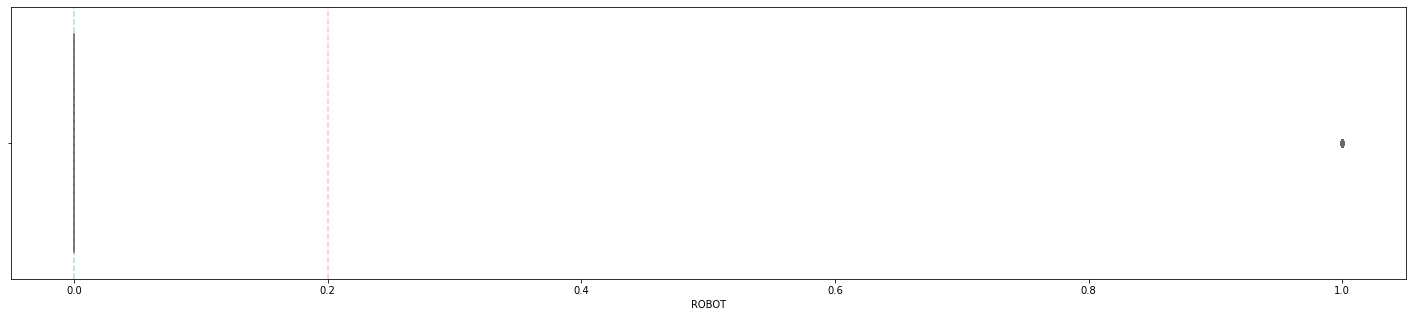

In [35]:
# set the figsize and plot the boxplot
plt.figure(figsize=(25, 5))
sns.boxplot(data=weblogs_clean, x='ROBOT', palette="Set3")
median = weblogs_clean['ROBOT'].median()
mean = weblogs_clean['ROBOT'].mean()
plt.axvline(median, color='lightblue', linestyle='--')
plt.axvline(mean, color='pink', linestyle='--')

In [36]:
weblogs_clean.shape

(67352, 9)

## Classificatiemodellen voor de trainingsdata

### Optimaal classificatiemodel uitzoeken

#### Altijd nodig

In [37]:
# set the X and y
X = weblogs_clean.drop('ROBOT', axis=1)
y = weblogs_clean['ROBOT']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Random Forest Classifier

In [38]:
# create the model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# create the pipeline
pipeline  = Pipeline([
    ("scaler", StandardScaler()),
    ("model", rfc)
])

# fit and predict the pipeline
pipeline.fit(X_train, y_train)
pred_rfc = pipeline.predict(X_test)

# check the probability score of the model
prob_rfc = pipeline.predict_proba(X_test)[:, 1]

#### Stochastic Gradient Descent Classifier

In [39]:
# create the model
sgd = SGDClassifier(loss='log', random_state=42)

# create the pipeline
pipeline  = Pipeline([
    ("scaler", StandardScaler()),
    ("model", sgd)
])

# fit and pred_sgdict the pipeline
pipeline.fit(X_train, y_train)
pred_sgd = pipeline.predict(X_test)

# check the probability score of the model
prob_sgd = pipeline.predict_proba(X_test)[:, 1]

#### Linear Support Vector Machine Classifier

In [40]:
# create the model
lsvc = LinearSVC(random_state=42)

# create the pipeline
pipeline  = Pipeline([
    ("scaler", StandardScaler()),
    ("model", lsvc)
])

# fit and predict the pipeline
pipeline.fit(X_train, y_train)
pred_lsvc = pipeline.predict(X_test)

#### Support Vector Machine Classifier

In [41]:
# create the model
svc = SVC(gamma="scale", random_state=42, probability=True)

# create the pipeline
pipeline  = Pipeline([
    ("scaler", StandardScaler()),
    ("model", svc)
])

# fit and predict the pipeline
pipeline.fit(X_train, y_train)
pred_svc = pipeline.predict(X_test)

# check the probability score of the model
prob_svc = pipeline.predict_proba(X_test)[:, 1]

#### Logistic Regression

In [42]:
# create the model
lgr = LogisticRegression(solver="lbfgs", random_state=42)

# create the pipeline
pipeline  = Pipeline([
    ("scaler", StandardScaler()),
    ("model", lgr)
])

# fit and predict the pipeline
pipeline.fit(X_train, y_train)
pred_lgr = pipeline.predict(X_test)

# check the probability score of the model
prob_lgr = pipeline.predict_proba(X_test)[:, 1]

#### Decision Tree Classifier

In [43]:
# create the model
dtc = DecisionTreeClassifier(random_state=42)

# create the pipeline
pipeline  = Pipeline([
    ("scaler", StandardScaler()),
    ("model", dtc)
])

# fit and predict the pipeline
pipeline.fit(X_train, y_train)
pred_dtc = pipeline.predict(X_test)

# check the probability score of the model
prob_dtc = pipeline.predict_proba(X_test)[:, 1]

#### Gradient Boosting Classifier

In [44]:
# split the data
X_train1, X_val, y_train1, y_val = train_test_split(X, y, random_state=49)

# create the model
gbc = GradientBoostingClassifier(max_depth=2, n_estimators=1500, random_state=42)

# create the pipeline
pipeline  = Pipeline([
    ("scaler", StandardScaler()),
    ("model", gbc)
])

# fit the model
pipeline.fit(X_train1, y_train1)

# predict the model
pred_gbc = pipeline.predict(X_test)

# find the best n_estimators for the model
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbc.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

# create the model with the best n_estimators
gbc_best = GradientBoostingClassifier(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbc_best.fit(X_train1, y_train1)

# predict the model
pred_gbc = gbc_best.predict(X_test)

# check the probability score of the model
prob_gbc = pipeline.predict_proba(X_test)[:, 1]

#### Voting Classifiers

##### Hard Voting

In [45]:
# create the model
hard_voting = VotingClassifier(estimators=[('rfc', rfc), ('sgd', sgd), ('lsvc', lsvc), ('svc', svc), ('lgr', lgr), ('dtc', dtc)], voting='hard')

# create the pipeline
pipeline  = Pipeline([
    ("scaler", StandardScaler()),
    ("model", hard_voting)
])

# fit the pipeline
pipeline.fit(X_train, y_train)

# print the results
for classifier in (rfc, sgd, lsvc, svc, lgr, dtc, hard_voting):
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    print(classifier.__class__.__name__, ":", accuracy_score(y_test, pred) * 100, "%")

RandomForestClassifier : 95.36040383045061 %
SGDClassifier : 92.68057308291885 %
LinearSVC : 92.73253656001782 %
SVC : 92.53952935936456 %
LogisticRegression : 92.93296711454235 %
DecisionTreeClassifier : 95.10058644495582 %
VotingClassifier : 92.79934674485932 %


##### Soft Voting

In [46]:
# create the model
soft_voting = VotingClassifier(estimators=[('rfc', rfc), ('sgd', sgd), ('svc', svc), ('lgr', lgr), ('dtc', dtc)], voting='soft')

# create the pipeline
pipeline  = Pipeline([
    ("scaler", StandardScaler()),
    ("model", soft_voting)
])

# fit the pipeline
pipeline.fit(X_train, y_train)

# print the results
for classifier in (rfc, sgd, svc, lgr, dtc, soft_voting):
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    print(classifier.__class__.__name__, ":", accuracy_score(y_test, pred) * 100, "%")

RandomForestClassifier : 95.36040383045061 %
SGDClassifier : 92.68057308291885 %
SVC : 92.53952935936456 %
LogisticRegression : 92.93296711454235 %
DecisionTreeClassifier : 95.10058644495582 %
VotingClassifier : 94.0464701952342 %


#### AdaBoost Classifier

In [47]:
# create the model
ada = AdaBoostClassifier(RandomForestClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=42)

# create the pipeline
pipeline  = Pipeline([
    ("scaler", StandardScaler()),
    ("model", ada)
])

# fit and predict the pipeline
pipeline.fit(X_train, y_train)
pred_ada = pipeline.predict(X_test)

# check the probability score of the model
prob_ada = pipeline.predict_proba(X_test)[:, 1]

#### Bagging Classifier for Random Forest Classifier

##### Bagging Classifier

In [48]:
# create the model
bagging = BaggingClassifier(base_estimator=rfc, n_estimators=100, random_state=42, n_jobs=-1, bootstrap=True)

# create the pipeline
pipeline  = Pipeline([
    ("scaler", StandardScaler()),
    ("model", bagging)
])

# fit and predict the pipeline
pipeline.fit(X_train, y_train)
pred_bag = pipeline.predict(X_test)

##### Pasting Classifier

In [49]:
# create the model
pasting = BaggingClassifier(base_estimator=rfc, n_estimators=100, random_state=42, n_jobs=-1, bootstrap=False)

# create the pipeline
pipeline  = Pipeline([
    ("scaler", StandardScaler()),
    ("model", pasting)
])

# fit and predict the pipeline
pipeline.fit(X_train, y_train)
pred_pas = pipeline.predict(X_test)

# check the model score
score = pipeline.score(X_test, y_test)
print("Score:", score * 100, "%")

Score: 95.397520599807 %


#### Polynomial Super Vector Machine

In [50]:
# create the model
poly_svm = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    StandardScaler(), 
    LinearSVC(C=5, max_iter=10_000, loss="hinge", random_state=42)
)

# fit and predict the model
poly_svm.fit(X_train, y_train)
pred_poly_svm = poly_svm.predict(X_test)

#### Polynomial Kernel

In [51]:
# create the model
poly_kernel_svm = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=1, coef0=20, C=5, probability=True, random_state=42)
)

# fit and predict the model
poly_kernel_svm.fit(X_train, y_train)
pred_poly_kernel_svm = poly_kernel_svm.predict(X_test)

# check the probability score of the model
prob_poly_kernel_svm = poly_kernel_svm.predict_proba(X_test)[:, 1]

#### Grid Search on Random Forest Classifier

In [52]:
# make a grid search for the model random forest
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15],
}

# create gridsearch the model
gs = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', return_train_score=True)

# fit the model
gs.fit(X_train, y_train)

# create the new random forest model with the best parameters
rfc_tuned = RandomForestClassifier(n_estimators=gs.best_params_['n_estimators'], max_depth=gs.best_params_['max_depth'], random_state=42, n_jobs=-1)

# create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', rfc_tuned)
])

# fit the pipeline
pipeline.fit(X_train, y_train)

# predict the values
pred_rfc_tuned = pipeline.predict(X_test)
prob_rfc_tuned = pipeline.predict_proba(X_test)[:, 1]

# predict the probabilities (percentage)
pred_rfc_tuned_proba = pipeline.predict_proba(X_test)

# check the best parameters
print("Best params:", gs.best_params_)

# check the best estimator
print("Best estimator:", gs.best_estimator_)

# check the training score
print("Training score:", gs.score(X_train, y_train))

# check the test score
print("Test score:", gs.score(X_test, y_test))

Best params: {'max_depth': 15, 'n_estimators': 200}
Best estimator: RandomForestClassifier(max_depth=15, n_estimators=200, random_state=42)
Training score: 0.960616915053544
Test score: 0.9539009724593571


### Vergelijking van verschillende maatstaven voor optimaal classificatiemodel

#### ROC

##### ROC Curve

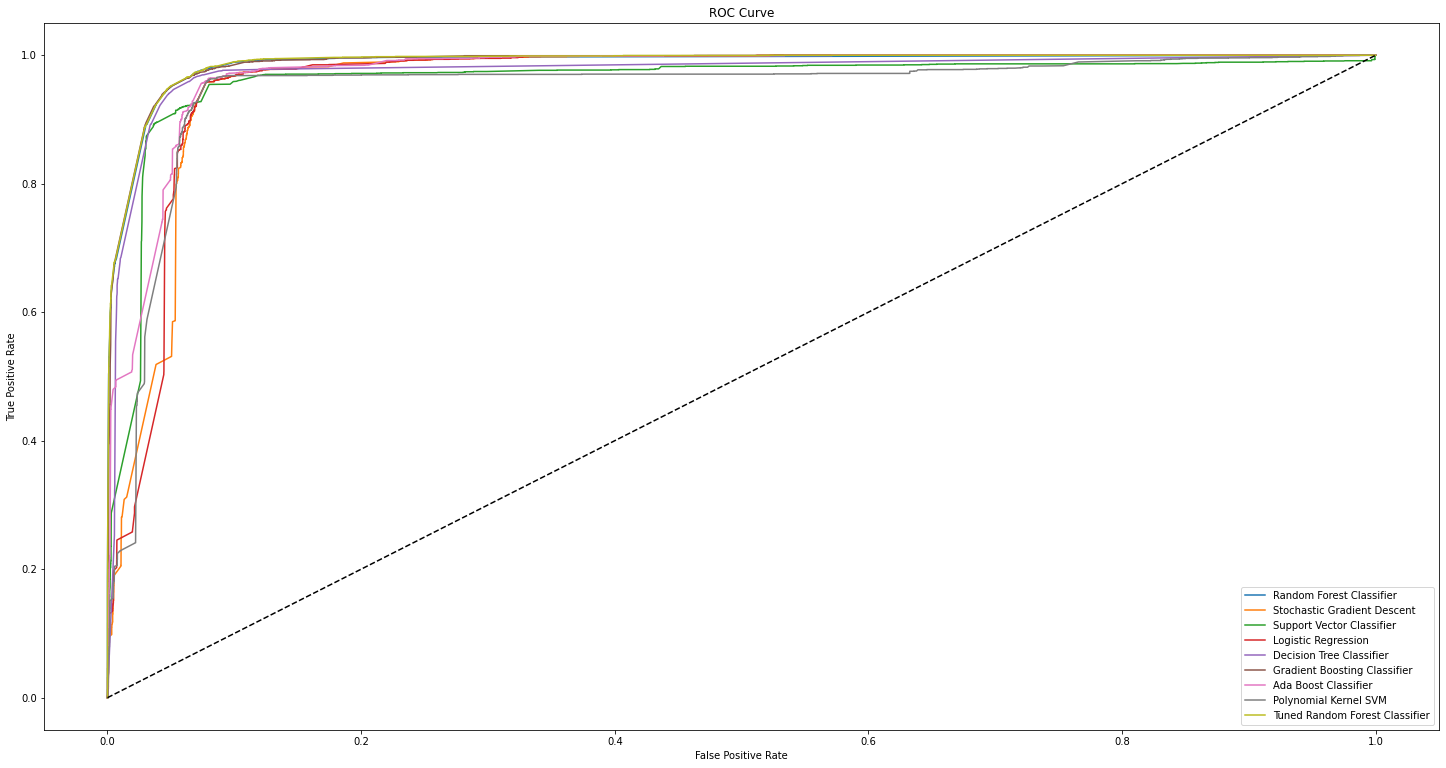

In [53]:
# make the roc curves for the models
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, prob_rfc)
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, prob_sgd)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, prob_svc)
fpr_lgr, tpr_lgr, thresholds_lgr = roc_curve(y_test, prob_lgr)
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, prob_dtc)
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test, prob_gbc)
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, prob_ada)
fpr_poly_kernel_svm, tpr_poly_kernel_svm, thresholds_poly_kernel_svm = roc_curve(y_test, prob_poly_kernel_svm)
fpr_rfc_tuned, tpr_rfc_tuned, thresholds_rfc_tuned = roc_curve(y_test, prob_rfc_tuned)

# set the figsize
plt.figure(figsize=(25, 13))

# plot the ROC curve
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest Classifier')
plt.plot(fpr_sgd, tpr_sgd, label='Stochastic Gradient Descent')
plt.plot(fpr_svc, tpr_svc, label='Support Vector Classifier')
plt.plot(fpr_lgr, tpr_lgr, label='Logistic Regression')
plt.plot(fpr_dtc, tpr_dtc, label='Decision Tree Classifier')
plt.plot(fpr_gbc, tpr_gbc, label='Gradient Boosting Classifier')
plt.plot(fpr_ada, tpr_ada, label='Ada Boost Classifier')
plt.plot(fpr_poly_kernel_svm, tpr_poly_kernel_svm, label='Polynomial Kernel SVM')
plt.plot(fpr_rfc_tuned, tpr_rfc_tuned, label='Tuned Random Forest Classifier')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Zoals je kan zien liggen Random Forest Classifier en Gradient Boosting Classifier heel dicht bij elkaar (als beste 2). Via de grafiek is het niet zo heel duidelijk te zien welk van de twee nu effectief het beste is, dus we gaan daarvoor gebruik maken van de roc_auc_score. Deze score geeft een getal tussen 0 en 1 die de oppervlakte onder hun lijn weergeeft. Hoe groter het getal (dus dichter bij 1, hoe beter de performance)

##### ROC AUC Score

In [54]:
# calculate the ROC AUC score for each model
roc_auc_gbc = roc_auc_score(y_test, prob_gbc) * 100
roc_auc_rfc = roc_auc_score(y_test, prob_rfc) * 100
roc_auc_dtc = roc_auc_score(y_test, prob_dtc) * 100
roc_auc_ada = roc_auc_score(y_test, prob_ada) * 100
roc_auc_lgr = roc_auc_score(y_test, prob_lgr) * 100
roc_auc_svc = roc_auc_score(y_test, prob_svc) * 100
roc_auc_sgd = roc_auc_score(y_test, prob_sgd) * 100
roc_auc_poly_kernel_svm = roc_auc_score(y_test, prob_poly_kernel_svm) * 100
roc_auc_rfc_tuned = roc_auc_score(y_test, prob_rfc_tuned) * 100

# print the ROC AUC score for each model
print("ROC AUC score for Gradient Boosting Classifier:", roc_auc_gbc, "%")
print("ROC AUC score for Random Forest Classifier:", roc_auc_rfc, "%")
print("ROC AUC score for Decision Tree Classifier:", roc_auc_dtc, "%")
print("ROC AUC score for Ada Boost Classifier:", roc_auc_ada, "%")
print("ROC AUC score for Logistic Regression:", roc_auc_lgr, "%")
print("ROC AUC score for Support Vector Classifier:", roc_auc_svc, "%")
print("ROC AUC score for Stochastic Gradient Descent:", roc_auc_sgd, "%")
print("ROC AUC score for Polynomial Kernel SVM:", roc_auc_poly_kernel_svm, "%")
print("ROC AUC score for Tuned Random Forest Classifier:", roc_auc_rfc_tuned, "%")

# create a table for the ROC AUC score for each model without linenumbers or indexes
roc_auc_score_table = pd.DataFrame({
    "Model": ["Gradient Boosting Classifier", "Random Forest Classifier", "Decision Tree Classifier", "Ada Boost Classifier", "Logistic Regression", "Support Vector Classifier", "Stochastic Gradient Descent", "Polynomial Kernel SVM", "Tuned Random Forest Classifier"],
    "ROC AUC Score": [roc_auc_gbc, roc_auc_rfc, roc_auc_dtc, roc_auc_ada, roc_auc_lgr, roc_auc_svc, roc_auc_sgd, roc_auc_poly_kernel_svm, roc_auc_rfc_tuned]
})

# sort the table by the ROC AUC score
roc_auc_score_table.sort_values(by="ROC AUC Score", ascending=False)

ROC AUC score for Gradient Boosting Classifier: 98.81072757970637 %
ROC AUC score for Random Forest Classifier: 98.75359485178906 %
ROC AUC score for Decision Tree Classifier: 97.5191992960632 %
ROC AUC score for Ada Boost Classifier: 97.31917692694584 %
ROC AUC score for Logistic Regression: 96.08967806766728 %
ROC AUC score for Support Vector Classifier: 96.06060511914488 %
ROC AUC score for Stochastic Gradient Descent: 96.05669052360649 %
ROC AUC score for Polynomial Kernel SVM: 94.8120976881448 %
ROC AUC score for Tuned Random Forest Classifier: 98.87582067562329 %


,Model,ROC AUC Score
8,Tuned Random Forest Classifier,98.875821
0,Gradient Boosting Classifier,98.810728
1,Random Forest Classifier,98.753595
2,Decision Tree Classifier,97.519199
3,Ada Boost Classifier,97.319177
4,Logistic Regression,96.089678
5,Support Vector Classifier,96.060605
6,Stochastic Gradient Descent,96.056691
7,Polynomial Kernel SVM,94.812098


#### Accuracy Score

In [55]:
# calculate the accuracy score for each model
acc_rfc = accuracy_score(y_test, pred_rfc) * 100
acc_sgd = accuracy_score(y_test, pred_sgd) * 100
acc_lsvc = accuracy_score(y_test, pred_lsvc) * 100
acc_svc = accuracy_score(y_test, pred_svc) * 100
acc_lgr = accuracy_score(y_test, pred_lgr) * 100
acc_dtc = accuracy_score(y_test, pred_dtc) * 100
acc_gbc = accuracy_score(y_test, pred_gbc) * 100
acc_ada = accuracy_score(y_test, pred_ada) * 100
acc_bag = accuracy_score(y_test, pred_bag) * 100
acc_pas = accuracy_score(y_test, pred_pas) * 100
acc_poly_svm = accuracy_score(y_test, pred_poly_svm) * 100
acc_poly_kernel_svm = accuracy_score(y_test, pred_poly_kernel_svm) * 100
acc_rfc_tuned = accuracy_score(y_test, pred_rfc_tuned) * 100

# print the accuracy score for each model
print("Accuracy score for Random Forest Classifier:", acc_rfc, "%")
print("Accuracy score for Stochastic Gradient Descent:", acc_sgd, "%")
print("Accuracy score for Linear Support Vector Classifier:", acc_lsvc, "%")
print("Accuracy score for Support Vector Classifier:", acc_svc, "%")
print("Accuracy score for Logistic Regression:", acc_lgr, "%")
print("Accuracy score for Decision Tree Classifier:", acc_dtc, "%")
print("Accuracy score for Gradient Boosting Classifier:", acc_gbc, "%")
print("Accuracy score for Ada Boost Classifier:", acc_ada, "%")
print("Accuracy score for Bagging Classifier:", acc_bag, "%")
print("Accuracy score for Pasting Classifier:", acc_pas, "%")
print("Accuracy score for Polynomial SVM:", acc_poly_svm, "%")
print("Accuracy score for Polynomial Kernel SVM:", acc_poly_kernel_svm, "%")
print("Accuracy score for Tuned Random Forest Classifier:", acc_rfc_tuned, "%")

# create a table of the accuracy score for each model
acc_table = pd.DataFrame({
    "Model": ["Gradient Boosting Classifier", "Random Forest Classifier", "Decision Tree Classifier", "Ada Boost Classifier", "Logistic Regression", "Support Vector Classifier", "Stochastic Gradient Descent", "Polynomial Kernel SVM", "Tuned Random Forest Classifier"],
    "Accuracy Score": [acc_gbc, acc_rfc, acc_dtc, acc_ada, acc_lgr, acc_svc, acc_sgd, acc_poly_kernel_svm, acc_rfc_tuned]
})

# sort the table by the accuracy score
acc_table.sort_values(by='Accuracy Score', ascending=False)

Accuracy score for Random Forest Classifier: 95.37525053819316 %
Accuracy score for Stochastic Gradient Descent: 92.88842699131467 %
Accuracy score for Linear Support Vector Classifier: 92.91069705292851 %
Accuracy score for Support Vector Classifier: 94.89273253656002 %
Accuracy score for Logistic Regression: 92.93296711454235 %
Accuracy score for Decision Tree Classifier: 95.10800979882711 %
Accuracy score for Gradient Boosting Classifier: 92.96266053002746 %
Accuracy score for Ada Boost Classifier: 93.2002078539084 %
Accuracy score for Bagging Classifier: 95.3900972459357 %
Accuracy score for Pasting Classifier: 95.397520599807 %
Accuracy score for Polynomial SVM: 95.13027986044095 %
Accuracy score for Polynomial Kernel SVM: 92.89585034518596 %
Accuracy score for Tuned Random Forest Classifier: 95.397520599807 %


,Model,Accuracy Score
8,Tuned Random Forest Classifier,95.397521
1,Random Forest Classifier,95.375251
2,Decision Tree Classifier,95.108010
5,Support Vector Classifier,94.892733
3,Ada Boost Classifier,93.200208
0,Gradient Boosting Classifier,92.962661
4,Logistic Regression,92.932967
7,Polynomial Kernel SVM,92.895850
6,Stochastic Gradient Descent,92.888427


#### Cross Validation Score

In [56]:
# calculate the mean cross validation score for each model
cv_gbc = cross_val_score(gbc, X_train, y_train, cv=3).mean() * 100
cv_rfc = cross_val_score(rfc, X_train, y_train, cv=3).mean() * 100
cv_dtc = cross_val_score(dtc, X_train, y_train, cv=3).mean() * 100
cv_ada = cross_val_score(ada, X_train, y_train, cv=3).mean() * 100
cv_lgr = cross_val_score(lgr, X_train, y_train, cv=3).mean() * 100
cv_svc = cross_val_score(svc, X_train, y_train, cv=3).mean() * 100
cv_lsvc = cross_val_score(lsvc, X_train, y_train, cv=3).mean() * 100
cv_sgd = cross_val_score(sgd, X_train, y_train, cv=3).mean() * 100
cv_bag = cross_val_score(bagging, X_train, y_train, cv=3).mean() * 100
cv_pas = cross_val_score(pasting, X_train, y_train, cv=3).mean() * 100
cv_poly_svm = cross_val_score(poly_svm, X_train, y_train, cv=3).mean() * 100
cv_poly_kernel_svm = cross_val_score(poly_kernel_svm, X_train, y_train, cv=3).mean() * 100
cv_rfc_tuned = cross_val_score(rfc_tuned, X_train, y_train, cv=3).mean() * 100

# print the mean cross validation score for each model
print("Mean cross validation score for Gradient Boosting Classifier:", cv_gbc, "%")
print("Mean cross validation score for Random Forest Classifier:", cv_rfc, "%")
print("Mean cross validation score for Decision Tree Classifier:", cv_dtc, "%")
print("Mean cross validation score for Ada Boost Classifier:", cv_ada, "%")
print("Mean cross validation score for Logistic Regression:", cv_lgr, "%")
print("Mean cross validation score for Support Vector Classifier:", cv_svc, "%")
print("Mean cross validation score for Linear Support Vector Classifier:", cv_lsvc, "%")
print("Mean cross validation score for Stochastic Gradient Descent:", cv_sgd, "%")
print("Mean cross validation score for Bagging Classifier:", cv_bag, "%")
print("Mean cross validation score for Pasting Classifier:", cv_pas, "%")
print("Mean cross validation score for Polynomial SVM:", cv_poly_svm, "%")
print("Mean cross validation score for Polynomial Kernel SVM:", cv_poly_kernel_svm, "%")
print("Mean cross validation score for Tuned Random Forest Classifier:", cv_rfc_tuned, "%")

# create a table of the mean cross validation score for each model
cv_score_table = pd.DataFrame({
    "Model": ["Gradient Boosting Classifier", "Random Forest Classifier", "Decision Tree Classifier", "Ada Boost Classifier", "Logistic Regression", "Support Vector Classifier", "Stochastic Gradient Descent", "Polynomial Kernel SVM", "Bagging Classifier", "Pasting Classifier", "Linear Support Vector Classifier", "Polynomial SVM", "Tuned Random Forest Classifier"],
    "Mean Cross Validation Score": [cv_gbc, cv_rfc, cv_dtc, cv_ada, cv_lgr, cv_svc, cv_sgd, cv_poly_kernel_svm, cv_bag, cv_pas, cv_lsvc, cv_poly_svm, cv_rfc_tuned]
})

# sort the table by the mean cross validation score
cv_score_table.sort_values(by='Mean Cross Validation Score', ascending=False)

Mean cross validation score for Gradient Boosting Classifier: 95.3527210465536 %
Mean cross validation score for Random Forest Classifier: 95.59399196485563 %
Mean cross validation score for Decision Tree Classifier: 95.28776322136882 %
Mean cross validation score for Ada Boost Classifier: 93.60071594947512 %
Mean cross validation score for Logistic Regression: 93.29819512846174 %
Mean cross validation score for Support Vector Classifier: 92.85648125586961 %
Mean cross validation score for Linear Support Vector Classifier: 93.27963546936039 %
Mean cross validation score for Stochastic Gradient Descent: 93.25365293862183 %
Mean cross validation score for Bagging Classifier: 95.59584763109811 %
Mean cross validation score for Pasting Classifier: 95.56800850411395 %
Mean cross validation score for Polynomial SVM: 95.23394053030928 %
Mean cross validation score for Polynomial Kernel SVM: 93.2963403922224 %
Mean cross validation score for Tuned Random Forest Classifier: 95.56429861830055 %


,Model,Mean Cross Validation Score
8,Bagging Classifier,95.595848
1,Random Forest Classifier,95.593992
9,Pasting Classifier,95.568009
12,Tuned Random Forest Classifier,95.564299
0,Gradient Boosting Classifier,95.352721
2,Decision Tree Classifier,95.287763
11,Polynomial SVM,95.233941
3,Ada Boost Classifier,93.600716
4,Logistic Regression,93.298195
7,Polynomial Kernel SVM,93.296340


#### Precision Score

In [57]:
# calculate the precision score for each model
pre_rfc = precision_score(y_test, pred_rfc) * 100
pre_sgd = precision_score(y_test, pred_sgd) * 100
pre_lsvc = precision_score(y_test, pred_lsvc) * 100
pre_svc = precision_score(y_test, pred_svc) * 100
pre_lgr = precision_score(y_test, pred_lgr) * 100
pre_dtc = precision_score(y_test, pred_dtc) * 100
pre_gbc = precision_score(y_test, pred_gbc) * 100
pre_ada = precision_score(y_test, pred_ada) * 100
pre_bag = precision_score(y_test, pred_bag) * 100
pre_pas = precision_score(y_test, pred_pas) * 100
pre_poly_svm = precision_score(y_test, pred_poly_svm) * 100
pre_poly_kernel_svm = precision_score(y_test, pred_poly_kernel_svm) * 100
pre_rfc_tuned = precision_score(y_test, pred_rfc_tuned) * 100

# print the precision score for each model
print("Precision score for Random Forest Classifier:", pre_rfc, "%")
print("Precision score for Stochastic Gradient Descent:", pre_sgd, "%")
print("Precision score for Linear Support Vector Classifier:", pre_lsvc, "%")
print("Precision score for Support Vector Classifier:", pre_svc, "%")
print("Precision score for Logistic Regression:", pre_lgr, "%")
print("Precision score for Decision Tree Classifier:", pre_dtc, "%")
print("Precision score for Gradient Boosting Classifier:", pre_gbc, "%")
print("Precision score for Ada Boost Classifier:", pre_ada, "%")
print("Precision score for Bagging Classifier:", pre_bag, "%")
print("Precision score for Pasting Classifier:", pre_pas, "%")
print("Precision score for Polynomial SVM:", pre_poly_svm, "%")
print("Precision score for Polynomial Kernel SVM:", pre_poly_kernel_svm, "%")
print("Precision score for Tuned Random Forest Classifier:", pre_rfc_tuned, "%")

# create a table of the precision score for each model
pre_table = pd.DataFrame({
    "Model": ["Gradient Boosting Classifier", "Random Forest Classifier", "Decision Tree Classifier", "Ada Boost Classifier", "Logistic Regression", "Support Vector Classifier", "Stochastic Gradient Descent", "Polynomial Kernel SVM", "Bagging Classifier", "Pasting Classifier", "Polynomial SVM", "Linear Support Vector Classifier", "Tuned Random Forest Classifier"],
    "Precision Score": [pre_gbc, pre_rfc, pre_dtc, pre_ada, pre_lgr, pre_svc, pre_sgd, pre_poly_kernel_svm, pre_bag, pre_pas, pre_poly_svm, pre_lsvc, pre_rfc_tuned]
})

# sort the table by the precision score
pre_table.sort_values(by='Precision Score', ascending=False)

Precision score for Random Forest Classifier: 87.65972982840454 %
Precision score for Stochastic Gradient Descent: 76.53562653562653 %
Precision score for Linear Support Vector Classifier: 76.45979822684194 %
Precision score for Support Vector Classifier: 85.96112311015118 %
Precision score for Logistic Regression: 76.52998776009792 %
Precision score for Decision Tree Classifier: 86.60166124954858 %
Precision score for Gradient Boosting Classifier: 76.83755404570722 %
Precision score for Ada Boost Classifier: 77.50155376009944 %
Precision score for Bagging Classifier: 87.69623950346842 %
Precision score for Pasting Classifier: 85.79348579348579 %
Precision score for Polynomial SVM: 87.6763177431329 %
Precision score for Polynomial Kernel SVM: 75.2851711026616 %
Precision score for Tuned Random Forest Classifier: 87.81112737920938 %


,Model,Precision Score
12,Tuned Random Forest Classifier,87.811127
8,Bagging Classifier,87.696240
10,Polynomial SVM,87.676318
1,Random Forest Classifier,87.659730
2,Decision Tree Classifier,86.601661
5,Support Vector Classifier,85.961123
9,Pasting Classifier,85.793486
3,Ada Boost Classifier,77.501554
0,Gradient Boosting Classifier,76.837554
6,Stochastic Gradient Descent,76.535627


#### Recall Score

In [58]:
# calculate the recall score for each model
rec_rfc = recall_score(y_test, pred_rfc) * 100
rec_sgd = recall_score(y_test, pred_sgd) * 100
rec_lsvc = recall_score(y_test, pred_lsvc) * 100
rec_svc = recall_score(y_test, pred_svc) * 100
rec_lgr = recall_score(y_test, pred_lgr) * 100
rec_dtc = recall_score(y_test, pred_dtc) * 100
rec_gbc = recall_score(y_test, pred_gbc) * 100
rec_ada = recall_score(y_test, pred_ada) * 100
rec_bag = recall_score(y_test, pred_bag) * 100
rec_pas = recall_score(y_test, pred_pas) * 100
rec_poly_svm = recall_score(y_test, pred_poly_svm) * 100
rec_poly_kernel_svm = recall_score(y_test, pred_poly_kernel_svm) * 100
rec_rfc_tuned = recall_score(y_test, pred_rfc_tuned) * 100

# print the recall score for each model
print("Recall score for Random Forest Classifier:", rec_rfc, "%")
print("Recall score for Stochastic Gradient Descent:", rec_sgd, "%")
print("Recall score for Linear Support Vector Classifier:", rec_lsvc, "%")
print("Recall score for Support Vector Classifier:", rec_svc, "%")
print("Recall score for Logistic Regression:", rec_lgr, "%")
print("Recall score for Decision Tree Classifier:", rec_dtc, "%")
print("Recall score for Gradient Boosting Classifier:", rec_gbc, "%")
print("Recall score for Ada Boost Classifier:", rec_ada, "%")
print("Recall score for Bagging Classifier:", rec_bag, "%")
print("Recall score for Pasting Classifier:", rec_pas, "%")
print("Recall score for Polynomial SVM:", rec_poly_svm, "%")
print("Recall score for Polynomial Kernel SVM:", rec_poly_kernel_svm, "%")
print("Recall score for Tuned Random Forest Classifier:", rec_rfc_tuned, "%")

# create a table of the recall score for each model
rec_table = pd.DataFrame({
    "Model": ["Gradient Boosting Classifier", "Random Forest Classifier", "Decision Tree Classifier", "Ada Boost Classifier", "Logistic Regression", "Support Vector Classifier", "Stochastic Gradient Descent", "Polynomial Kernel SVM", "Tuned Random Forest Classifier"],
    "Recall Score": [rec_gbc, rec_rfc, rec_dtc, rec_ada, rec_lgr, rec_svc, rec_sgd, rec_poly_kernel_svm, rec_rfc_tuned]
})

# sort the table by the recall score
rec_table.sort_values(by='Recall Score', ascending=False)

Recall score for Random Forest Classifier: 89.38942665673865 %
Recall score for Stochastic Gradient Descent: 92.77736411020105 %
Recall score for Linear Support Vector Classifier: 93.11243484735667 %
Recall score for Support Vector Classifier: 88.90543559195831 %
Recall score for Logistic Regression: 93.11243484735667 %
Recall score for Decision Tree Classifier: 89.2777364110201 %
Recall score for Gradient Boosting Classifier: 92.62844378257633 %
Recall score for Ada Boost Classifier: 92.85182427401341 %
Recall score for Bagging Classifier: 89.42665673864482 %
Recall score for Pasting Classifier: 92.18168279970216 %
Recall score for Polynomial SVM: 87.93745346239761 %
Recall score for Polynomial Kernel SVM: 95.83023082650783 %
Recall score for Tuned Random Forest Classifier: 89.31496649292629 %


,Model,Recall Score
7,Polynomial Kernel SVM,95.830231
4,Logistic Regression,93.112435
3,Ada Boost Classifier,92.851824
6,Stochastic Gradient Descent,92.777364
0,Gradient Boosting Classifier,92.628444
1,Random Forest Classifier,89.389427
8,Tuned Random Forest Classifier,89.314966
2,Decision Tree Classifier,89.277736
5,Support Vector Classifier,88.905436


#### F1 Score

In [59]:
# calculate the F1 score for each model
f1_rfc = f1_score(y_test, pred_rfc) * 100
f1_sgd = f1_score(y_test, pred_sgd) * 100
f1_lsvc = f1_score(y_test, pred_lsvc) * 100
f1_svc = f1_score(y_test, pred_svc) * 100
f1_lgr = f1_score(y_test, pred_lgr) * 100
f1_dtc = f1_score(y_test, pred_dtc) * 100
f1_gbc = f1_score(y_test, pred_gbc) * 100
f1_ada = f1_score(y_test, pred_ada) * 100
f1_bag = f1_score(y_test, pred_bag) * 100
f1_pas = f1_score(y_test, pred_pas) * 100
f1_poly_svm = f1_score(y_test, pred_poly_svm) * 100
f1_poly_kernel_svm = f1_score(y_test, pred_poly_kernel_svm) * 100
f1_rfc_tuned = f1_score(y_test, pred_rfc_tuned) * 100

# print the F1 score for each model
print("F1 score for Random Forest Classifier:", f1_rfc, "%")
print("F1 score for Stochastic Gradient Descent:", f1_sgd, "%")
print("F1 score for Linear Support Vector Classifier:", f1_lsvc, "%")
print("F1 score for Support Vector Classifier:", f1_svc, "%")
print("F1 score for Logistic Regression:", f1_lgr, "%")
print("F1 score for Decision Tree Classifier:", f1_dtc, "%")
print("F1 score for Gradient Boosting Classifier:", f1_gbc, "%")
print("F1 score for Ada Boost Classifier:", f1_ada, "%")
print("F1 score for Bagging Classifier:", f1_bag, "%")
print("F1 score for Pasting Classifier:", f1_pas, "%")
print("F1 score for Polynomial SVM:", f1_poly_svm, "%")
print("F1 score for Polynomial Kernel SVM:", f1_poly_kernel_svm, "%")
print("F1 score for Tuned Random Forest Classifier:", f1_rfc_tuned, "%")

# create a table of the F1 score for each model
f1_table = pd.DataFrame({
    "Model": ["Gradient Boosting Classifier", "Random Forest Classifier", "Decision Tree Classifier", "Ada Boost Classifier", "Logistic Regression", "Support Vector Classifier", "Stochastic Gradient Descent", "Polynomial Kernel SVM", "Tuned Random Forest Classifier"],
    "F1 Score": [f1_gbc, f1_rfc, f1_dtc, f1_ada, f1_lgr, f1_svc, f1_sgd, f1_poly_kernel_svm, f1_rfc_tuned]
})

# sort the table by the F1 score
f1_table.sort_values(by='F1 Score', ascending=False)

F1 score for Random Forest Classifier: 88.51612903225808 %
F1 score for Stochastic Gradient Descent: 83.87748232918209 %
F1 score for Linear Support Vector Classifier: 83.96844049017962 %
F1 score for Support Vector Classifier: 87.40849194729137 %
F1 score for Logistic Regression: 84.01074907625126 %
F1 score for Decision Tree Classifier: 87.91934005499542 %
F1 score for Gradient Boosting Classifier: 83.99729912221471 %
F1 score for Ada Boost Classifier: 84.48509485094851 %
F1 score for Bagging Classifier: 88.55299539170508 %
F1 score for Pasting Classifier: 88.87293610911702 %
F1 score for Polynomial SVM: 87.80669144981412 %
F1 score for Polynomial Kernel SVM: 84.32432432432434 %
F1 score for Tuned Random Forest Classifier: 88.55666297526764 %


,Model,F1 Score
8,Tuned Random Forest Classifier,88.556663
1,Random Forest Classifier,88.516129
2,Decision Tree Classifier,87.919340
5,Support Vector Classifier,87.408492
3,Ada Boost Classifier,84.485095
7,Polynomial Kernel SVM,84.324324
4,Logistic Regression,84.010749
0,Gradient Boosting Classifier,83.997299
6,Stochastic Gradient Descent,83.877482


#### R2 Score

In [60]:
# calculate the R2 score for each model
r2_rfc = r2_score(y_test, pred_rfc) * 100
r2_sgd = r2_score(y_test, pred_sgd) * 100
r2_lsvc = r2_score(y_test, pred_lsvc) * 100
r2_svc = r2_score(y_test, pred_svc) * 100
r2_lgr = r2_score(y_test, pred_lgr) * 100
r2_dtc = r2_score(y_test, pred_dtc) * 100
r2_gbc = r2_score(y_test, pred_gbc) * 100
r2_ada = r2_score(y_test, pred_ada) * 100
r2_bag = r2_score(y_test, pred_bag) * 100
r2_pas = r2_score(y_test, pred_pas) * 100
r2_poly_svm = r2_score(y_test, pred_poly_svm) * 100
r2_poly_kernel_svm = r2_score(y_test, pred_poly_kernel_svm) * 100
r2_rfc_tuned = r2_score(y_test, pred_rfc_tuned) * 100

# print the R2 score for each model
print("R2 score for Random Forest Classifier:", r2_rfc, "%")
print("R2 score for Stochastic Gradient Descent:", r2_sgd, "%")
print("R2 score for Linear Support Vector Classifier:", r2_lsvc, "%")
print("R2 score for Support Vector Classifier:", r2_svc, "%")
print("R2 score for Logistic Regression:", r2_lgr, "%")
print("R2 score for Decision Tree Classifier:", r2_dtc, "%")
print("R2 score for Gradient Boosting Classifier:", r2_gbc, "%")
print("R2 score for Ada Boost Classifier:", r2_ada, "%")
print("R2 score for Bagging Classifier:", r2_bag, "%")
print("R2 score for Pasting Classifier:", r2_pas, "%")
print("R2 score for Polynomial SVM:", r2_poly_svm, "%")
print("R2 score for Polynomial Kernel SVM:", r2_poly_kernel_svm, "%")
print("R2 score for Tuned Random Forest Classifier:", r2_rfc_tuned, "%")

# create a table of the R2 score for each model
r2_table = pd.DataFrame({
    "Model": ["Gradient Boosting Classifier", "Random Forest Classifier", "Decision Tree Classifier", "Ada Boost Classifier", "Logistic Regression", "Support Vector Classifier", "Stochastic Gradient Descent", "Polynomial Kernel SVM", "Tuned Random Forest Classifier"],
    "R2 Score": [r2_gbc, r2_rfc, r2_dtc, r2_ada, r2_lgr, r2_svc, r2_sgd, r2_poly_kernel_svm, r2_rfc_tuned]
})

# sort the table by the R2 score
r2_table.sort_values(by='R2 Score', ascending=False)

R2 score for Random Forest Classifier: 71.02911747963564 %
R2 score for Stochastic Gradient Descent: 55.45087406980891 %
R2 score for Linear Support Vector Classifier: 55.590380727210345 %
R2 score for Support Vector Classifier: 68.00647323593792 %
R2 score for Logistic Regression: 55.72988738461178 %
R2 score for Decision Tree Classifier: 69.35503759081844 %
R2 score for Gradient Boosting Classifier: 55.91589626114701 %
R2 score for Ada Boost Classifier: 57.40396727342898 %
R2 score for Bagging Classifier: 71.12212191790327 %
R2 score for Pasting Classifier: 71.16862413703709 %
R2 score for Polynomial SVM: 69.49454424821988 %
R2 score for Polynomial Kernel SVM: 55.49737628894271 %
R2 score for Tuned Random Forest Classifier: 71.16862413703709 %


,Model,R2 Score
8,Tuned Random Forest Classifier,71.168624
1,Random Forest Classifier,71.029117
2,Decision Tree Classifier,69.355038
5,Support Vector Classifier,68.006473
3,Ada Boost Classifier,57.403967
0,Gradient Boosting Classifier,55.915896
4,Logistic Regression,55.729887
7,Polynomial Kernel SVM,55.497376
6,Stochastic Gradient Descent,55.450874


### Maatstaven voor nauwkeurigheid + voor- & nadelen

#### ROC AUC Score

**Uitleg**
- ROC AUC Score is de oppervlakte onder de ROC Curve (deze visualiseert de True Positive Rate ten opzichte van de False Positive Rate). Hoe dichter deze waarde bij 1 ligt, hoe beter het model.
<br><br>

**Voordelen**
- Nuttig wanneer je zowel gevoeligheid (sensitivity) als specificiteit (specificity) wilt optimaliseren en wanneer klassen ongebalanceerd zijn.
<br><br>

**Nadelen**
- Kan misleidend zijn wanneer de klassen zeer ongebalanceerd zijn.
- Het houdt ook geen rekening met True Negative Rate en False Negative Rate.

#### Accuracy Score

**Uitleg**
- Accuracy Score meet de verhouding van correct voorspellingen ten opzichte van het totaal aantal voorspellingen.
<br><br>

**Voordelen**
- Eenvoudig en intuïtief.
- Makkelijk te interpreteren.
<br><br>

**Nadelen**
- Kan misleidend zijn wanneer klassen ongebalanceerd zijn.

#### Cross Validation Score

**Uitleg**
- Cross Validation Score meet de algemene prestaties van het model, het is een maatstaf voor hoe goed het model in staat is om te generaliseren naar nieuwe, ongeziene data.
<br><br>

**Voordelen**
- Het helpt overfitting to voorkomen.
- Het helpt bij het kiezen van de beste hyperparameters.
<br><br>

**Nadelen**
- Het is computationally expensive, het vergt meer tijd en rekenkracht.
- Het kan leiden tot inconsistentie.

#### Precision Score

**Uitleg**
- Precision Score meet de verhouding van de True Positives ten opzichte van alle voorspelde Positives.
<br><br>

**Voordelen**
- Nuttig wanneer de kost van de False Positives hoog zijn.
<br><br>

**Nadelen**
- Kan misleidend zijn wanneer klassen ongebalanceerd zijn.
- Het houdt geen rekening met False Negatives.

#### Recall Score

**Uitleg**
- Recall Score meet de verhouding van de True Positives ten opzichte van alle werkelijke Positives.
<br><br>

**Voordelen**
- Nuttig wanneer de kost van alle False Negatives hoog zijn.
<br><br>

**Nadelen**
- Kan misleidend zijn wanneer de klassen ongebalanceerd zijn.
- Het houdt geen rekening met False Positives.

#### F1 Score

**Uitleg**
- F1 Score is het harmonic gemiddelde van Precision en Recall score en balanceert tussen beide.
<br><br>

**Voordelen**
- Nuttig wanneer je zowel Precision als Recall tegelijkertijd wilt gebruiken/optimaliseren.
<br><br>

**Nadelen**
- Kan misleidend zijn wanneer de klassen ongebalanceerd zijn.
- Het houdt geen rekening met True Negatives.

#### R2 Score

**Uitleg**
- R2 Score meet de verhouding van die variantie in de target variable die wordt verklaard door het model.
<br><br>

**Voordelen**
- Nuttig bij regressieproblemen wanneer je wilt meten hoe goed je model past bij de data.
<br><br>

**Nadelen**
- Kan beïnvloed worden door uitschieters.
- Het houdt geen rekening met de complexiteit van het model.

### Confusion matrix voor de 2 klassen (robot of geen robot)

#### Random Forest Classifier

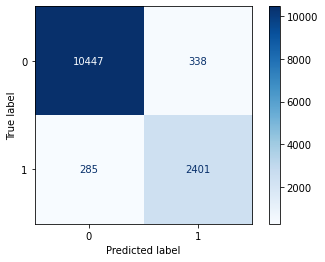

In [61]:
cm_rfc = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_rfc), display_labels=rfc.classes_)
cm_rfc.plot(cmap='Blues', values_format='d')

#### Stochastic Gradient Descent Classifier

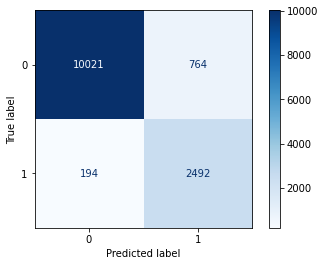

In [62]:
cm_sgd = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_sgd), display_labels=sgd.classes_)
cm_sgd.plot(cmap='Blues', values_format='d')

#### Linear Support Vector Machine Classifier

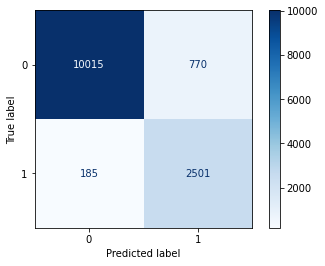

In [63]:
cm_lsvc = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_lsvc), display_labels=lsvc.classes_)
cm_lsvc.plot(cmap='Blues', values_format='d')

#### Support Vector Machine Classifier

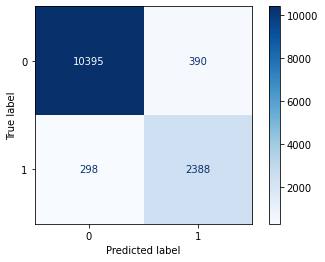

In [64]:
cm_svc = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_svc), display_labels=svc.classes_)
cm_svc.plot(cmap='Blues', values_format='d')

#### Logistic Regression

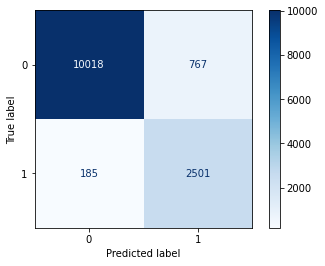

In [65]:
cm_lgr = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_lgr), display_labels=lgr.classes_)
cm_lgr.plot(cmap='Blues', values_format='d')

#### Decision Tree Classifier

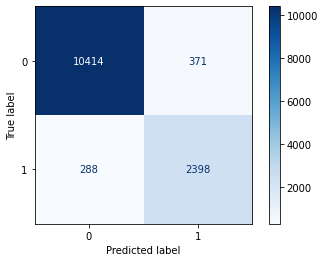

In [66]:
cm_dtc = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_dtc), display_labels=dtc.classes_)
cm_dtc.plot(cmap='Blues', values_format='d')

#### Gradient Boosting Classifier

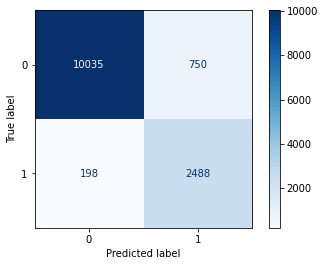

In [67]:
cm_gbc = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_gbc), display_labels=gbc.classes_)
cm_gbc.plot(cmap='Blues', values_format='d')

#### AdaBoost Classifier

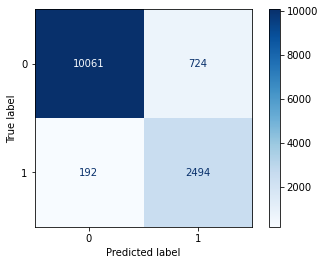

In [68]:
cm_ada = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_ada), display_labels=ada.classes_)
cm_ada.plot(cmap='Blues', values_format='d')

#### Bagging Classifier

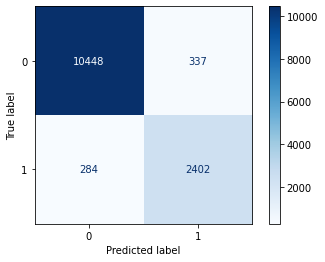

In [69]:
cm_bag = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_bag), display_labels=bagging.classes_)
cm_bag.plot(cmap='Blues', values_format='d')

#### Pasting Classifier

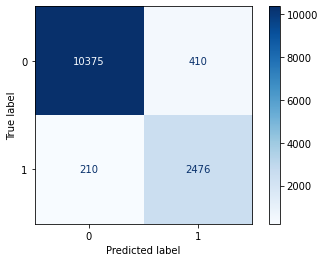

In [70]:
cm_pas = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_pas), display_labels=pasting.classes_)
cm_pas.plot(cmap='Blues', values_format='d')

#### Polynomial Super Vector Machine

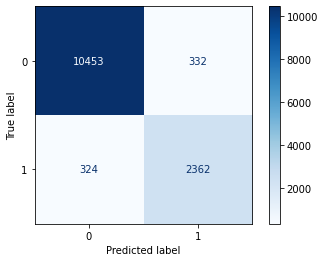

In [71]:
cm_poly_svm = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_poly_svm), display_labels=poly_svm.classes_)
cm_poly_svm.plot(cmap='Blues', values_format='d')

#### Polynomial Kernel

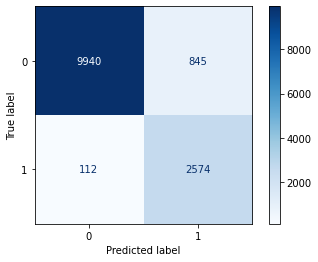

In [72]:
cm_poly_kernel = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_poly_kernel_svm), display_labels=poly_kernel_svm.classes_)
cm_poly_kernel.plot(cmap='Blues', values_format='d')

#### Tuned Random Forest Classifier

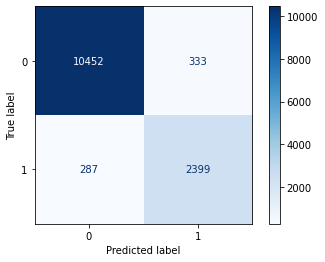

In [73]:
cm_rfc_tuned = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_rfc_tuned), display_labels=rfc_tuned.classes_)
cm_rfc_tuned.plot(cmap='Blues', values_format='d')

### Maatstaf voor zo weinig mogelijk menselijke sessies per vergissing cancelen

We willen zo weinig mogelijk mensen beschouwen als robots dus we willen zo weinig mogelijk 0 (mens) die als 1 (robot) worden geschat.
We moeten dus het aantal False Positives zo sterk mogelijk beperken.
Hierbij is de Precision score het belangrijkst.

## Conclusie

### Conclusie gekozen model

We zien dat in het algemeen de Tuned Random Forest Classifier voor de beste scores zorgt. We hadden hierboven dus daarop nog een gridsearch uitgevoerd om de parameters verder te optimaliseren en zo dus het beste model nog beter te maken.

De belangrijkste score waarop we ons kunnen baseren voor de goedheid van ons model is de precision score. Bij deze score is Tuned Random Forest Classifier de beste.

### Conclusie nuttige maatstaven

1. De accuracy score spreekt voor zich dat dit een belangrijke maatstaf zal worden.
2. De precision score is ook belangrijk: we willen zo weinig mogelijk mensen als robots beschouwen dus zo weinig mogelijk False Positives hebben.
3. De recall score is in ons geval iets minder belangrijk dan de precision score maar het zegt nog steeds redelijk wat over ons model.
4. Hetzelfde geldt voor de F1 score, deze probeert een balans te zoeken tussen precision en recall.
5. R2 is niet handig voor ons, deze score is eerder gemaakt voor regressiemodellen en dit is dus voor ons niet van toepassing. Het gaat ook niet evalueren op de 'individuele' predictions maar op het geheel van het model.

Samenvattend zijn de scores waarop we ons gaan baseren:
1. Precision score
2. Accuracy score